Aim: 
Implement logistic regression using python to perform classifiaction on
social network_ads , cv dataset.

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('Social_Network_Ads.csv')

In [32]:
df = df.head(10)

In [33]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,1
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,1
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [34]:
#input data
x=df[['Age','EstimatedSalary']]

#output data
y=df['Purchased']

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
x_scaled

array([[0.        , 0.        ],
       [1.        , 0.00763359],
       [0.4375    , 0.18320611],
       [0.5       , 0.29007634],
       [0.        , 0.4351145 ],
       [0.5       , 0.29770992],
       [0.5       , 0.49618321],
       [0.8125    , 1.        ],
       [0.375     , 0.10687023],
       [1.        , 0.35114504]])

In [37]:
#cross. validation

from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=0,test_size = 0.3,shuffle=False)

In [39]:
x_train

array([[0.        , 0.        ],
       [1.        , 0.00763359],
       [0.4375    , 0.18320611],
       [0.5       , 0.29007634],
       [0.        , 0.4351145 ],
       [0.5       , 0.29770992],
       [0.5       , 0.49618321]])

In [40]:
x_test

array([[0.8125    , 1.        ],
       [0.375     , 0.10687023],
       [1.        , 0.35114504]])

In [41]:
y_test

7    1
8    0
9    0
Name: Purchased, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression

<Axes: xlabel='Purchased', ylabel='count'>

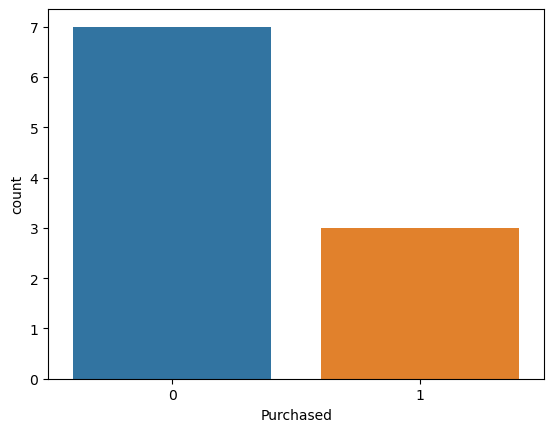

In [43]:
import seaborn as sns
sns.countplot(x=y)

In [44]:
y_train

0    1
1    0
2    0
3    0
4    1
5    0
6    0
Name: Purchased, dtype: int64

In [45]:
y.value_counts()

0    7
1    3
Name: Purchased, dtype: int64

In [46]:
#creat the object
classifier = LogisticRegression()

In [47]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [48]:
#predication
y_pred = classifier.predict(x_test)

In [49]:
y_pred

array([0, 0, 0], dtype=int64)

In [50]:
y_test

7    1
8    0
9    0
Name: Purchased, dtype: int64

In [51]:
import matplotlib.pyplot as plt

In [52]:
import matplotlib.colors as mcolors

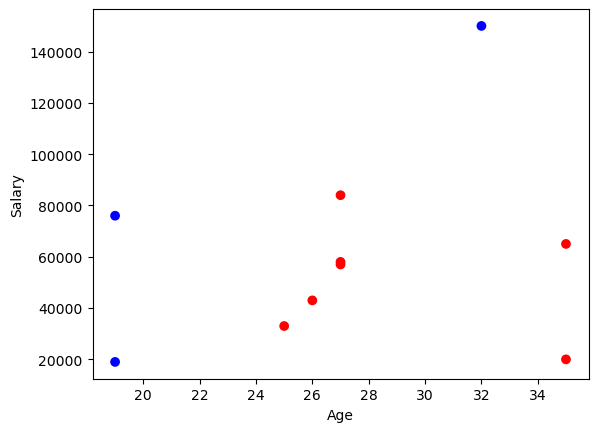

In [53]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'],x['EstimatedSalary'],c=y,cmap = mcolors.ListedColormap(["red", "blue"]))

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [55]:
pd.DataFrame(x_scaled).describe()

,0,1
count,10.000000,10.000000
mean,0.512500,0.316794
std,0.352077,0.293080
min,0.000000,0.000000
25%,0.390625,0.125954
50%,0.500000,0.293893
75%,0.734375,0.414122
max,1.000000,1.000000


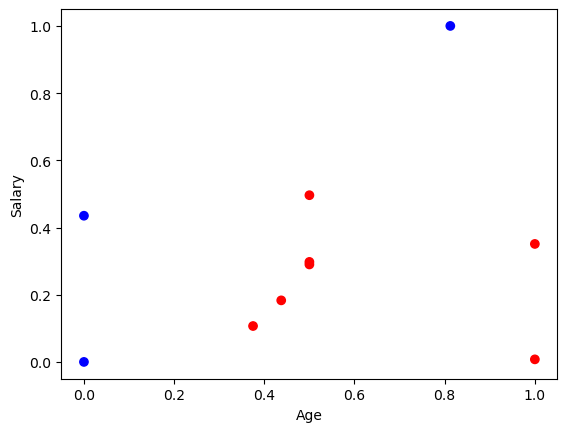

In [56]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y,cmap = mcolors.ListedColormap(["red", "blue"]))

In [87]:
from sklearn.metrics import confusion_matrix

In [89]:
y_test

7    1
8    0
9    0
Name: Purchased, dtype: int64

In [90]:
y_pred

array([0, 0, 0], dtype=int64)

In [112]:
confusion_matrix(y_pred,y_test)

array([[2, 1],
       [0, 0]], dtype=int64)

In [96]:
y_test.value_counts()

0    2
1    1
Name: Purchased, dtype: int64

In [113]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


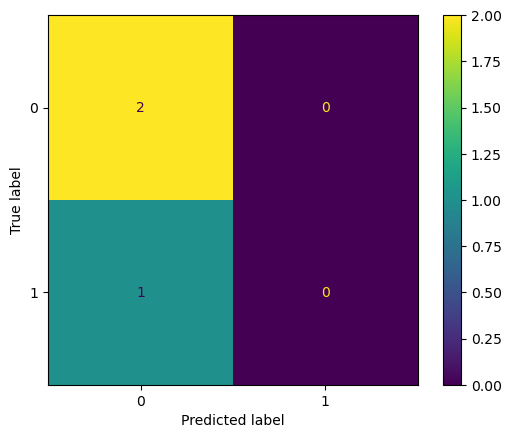

In [114]:
plot_confusion_matrix(classifier,x_test,y_test)

In [120]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test,y_pred)

In [121]:
error_rate = 1 - acs

In [122]:
acs

0.6666666666666666

In [123]:
error_rate

0.33333333333333337

In [104]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
